In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pickle
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df=pd.read_csv(os.path.dirname(os.getcwd())+'\\INPUTS\\model_training_set1.csv')

In [3]:
def check(id, row):
    global df
    if (id.split('_')[-1]).isnumeric() == True:
        ''
    else:
        df=df.drop(row)

In [4]:
df.apply(lambda x: check(x['ID'], x['place_id']), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
18199    None
18200    None
18201    None
18202    None
18203    None
Length: 18204, dtype: object

In [5]:
df2=pd.read_csv(os.path.dirname(os.getcwd())+'\\INPUTS\\model_training_set2.csv')

In [6]:
df2=df2.rename(columns={"OWNCD_NWOS_MANUAL": "OWNCD_NWOS"})

In [7]:
df=pd.concat([df, df2])

In [8]:
df=df.loc[df['OWNCD_NWOS'] != 45]

In [9]:
df=df.loc[df['OWNCD_NWOS'] != 44]

In [10]:
df.index=df.reset_index(drop=True).index

In [11]:
df=df.dropna(subset=['OWNCD_NWOS'])

In [12]:
df['Simple_Owners'] = df.Simple_Owners.map(lambda x: str(x).lower())
df['Simple_Owners']=df.Simple_Owners.str.replace('[^\w\s]', '')
df['Simple_Owners']=df.Simple_Owners.str.replace('of', '')
df['Simple_Owners'] = df['Simple_Owners'].apply(nltk.word_tokenize)

<ipython-input-12-cf0ec897ebce>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Simple_Owners']=df.Simple_Owners.str.replace('[^\w\s]', '')


In [13]:
stemmer =PorterStemmer()
df['Simple_Owners']=df['Simple_Owners'].apply(lambda x: [stemmer.stem(y) for y in x])

In [14]:
df['Simple_Owners']=df['Simple_Owners'].apply(lambda x: ' '.join(x))

In [15]:
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['Simple_Owners'])

In [16]:
f = open(os.path.dirname(os.getcwd())+'\\OUTPUTS\\model_dict.pkl',"wb")
pickle.dump(count_vect.vocabulary_,f)
f.close()

In [18]:
transformer = TfidfTransformer().fit(counts)

counts=transformer.transform(counts)

In [19]:
x=pd.DataFrame(counts.todense())

In [20]:
x_train, x_test, y_train, y_test = train_test_split(counts, df['OWNCD_NWOS'], test_size=0.2, random_state=0)

In [28]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

Feature ranking:
1. feature 4118 (0.089024)
2. feature 938 (0.056692)
3. feature 1104 (0.033644)
4. feature 231 (0.031517)
5. feature 2591 (0.028619)
6. feature 4375 (0.025924)
7. feature 1047 (0.022865)
8. feature 265 (0.018971)
9. feature 972 (0.018067)
10. feature 4377 (0.016608)
11. feature 1251 (0.016162)
12. feature 2132 (0.014333)
13. feature 4473 (0.013667)
14. feature 4485 (0.013237)
15. feature 3043 (0.013204)
16. feature 609 (0.013127)
17. feature 1236 (0.011667)
18. feature 927 (0.011145)
19. feature 387 (0.009342)
20. feature 1796 (0.008939)
21. feature 1249 (0.008682)
22. feature 4484 (0.008383)
23. feature 2467 (0.007955)
24. feature 1027 (0.007190)
25. feature 979 (0.006914)
26. feature 1292 (0.006825)
27. feature 2750 (0.006358)
28. feature 2754 (0.005809)
29. feature 1025 (0.005608)
30. feature 584 (0.005392)
31. feature 4686 (0.005340)
32. feature 379 (0.005325)
33. feature 3283 (0.005199)
34. feature 1296 (0.005144)
35. feature 3578 (0.004968)
36. feature 1461 (0.00

3792. feature 4501 (0.000000)
3793. feature 4499 (0.000000)
3794. feature 4497 (0.000000)
3795. feature 4491 (0.000000)
3796. feature 4490 (0.000000)
3797. feature 4530 (0.000000)
3798. feature 4536 (0.000000)
3799. feature 3958 (0.000000)
3800. feature 4558 (0.000000)
3801. feature 4581 (0.000000)
3802. feature 4580 (0.000000)
3803. feature 4579 (0.000000)
3804. feature 4571 (0.000000)
3805. feature 4569 (0.000000)
3806. feature 4568 (0.000000)
3807. feature 4565 (0.000000)
3808. feature 4559 (0.000000)
3809. feature 4557 (0.000000)
3810. feature 4539 (0.000000)
3811. feature 4556 (0.000000)
3812. feature 4554 (0.000000)
3813. feature 4552 (0.000000)
3814. feature 4548 (0.000000)
3815. feature 4545 (0.000000)
3816. feature 4543 (0.000000)
3817. feature 4542 (0.000000)
3818. feature 4541 (0.000000)
3819. feature 4478 (0.000000)
3820. feature 4470 (0.000000)
3821. feature 4468 (0.000000)
3822. feature 4388 (0.000000)
3823. feature 4413 (0.000000)
3824. feature 4409 (0.000000)
3825. feat

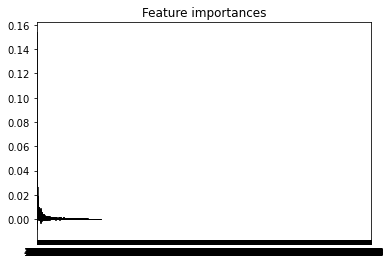

In [29]:
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [30]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 272   17    0    2]
 [   7 1382    0    4]
 [   2   17   29    0]
 [   1   16    2   22]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       291
          41       0.97      0.99      0.98      1393
          42       0.94      0.60      0.73        48
          43       0.79      0.54      0.64        41

    accuracy                           0.96      1773
   macro avg       0.91      0.77      0.82      1773
weighted avg       0.96      0.96      0.96      1773

0.9616469261139312


In [33]:
pkl_filename= os.path.dirname(os.getcwd())+'\\OUTPUTS\\classify_unknown_ownership_model.pkl'

In [35]:
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)